
https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists # Ссылка на задачу

#### Задание:

 Проиллюстрировать какие функции влияют на решение кандидата.




In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
import copy
import phik
from phik.report import plot_correlation_matrix
from phik import report

# Устанавливаем библиотеки 

In [4]:
df = pd.read_csv("/Work/Job/hr_analytics/aug_train.csv")
df.head()
# Открываем и смотрим данные

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [11]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

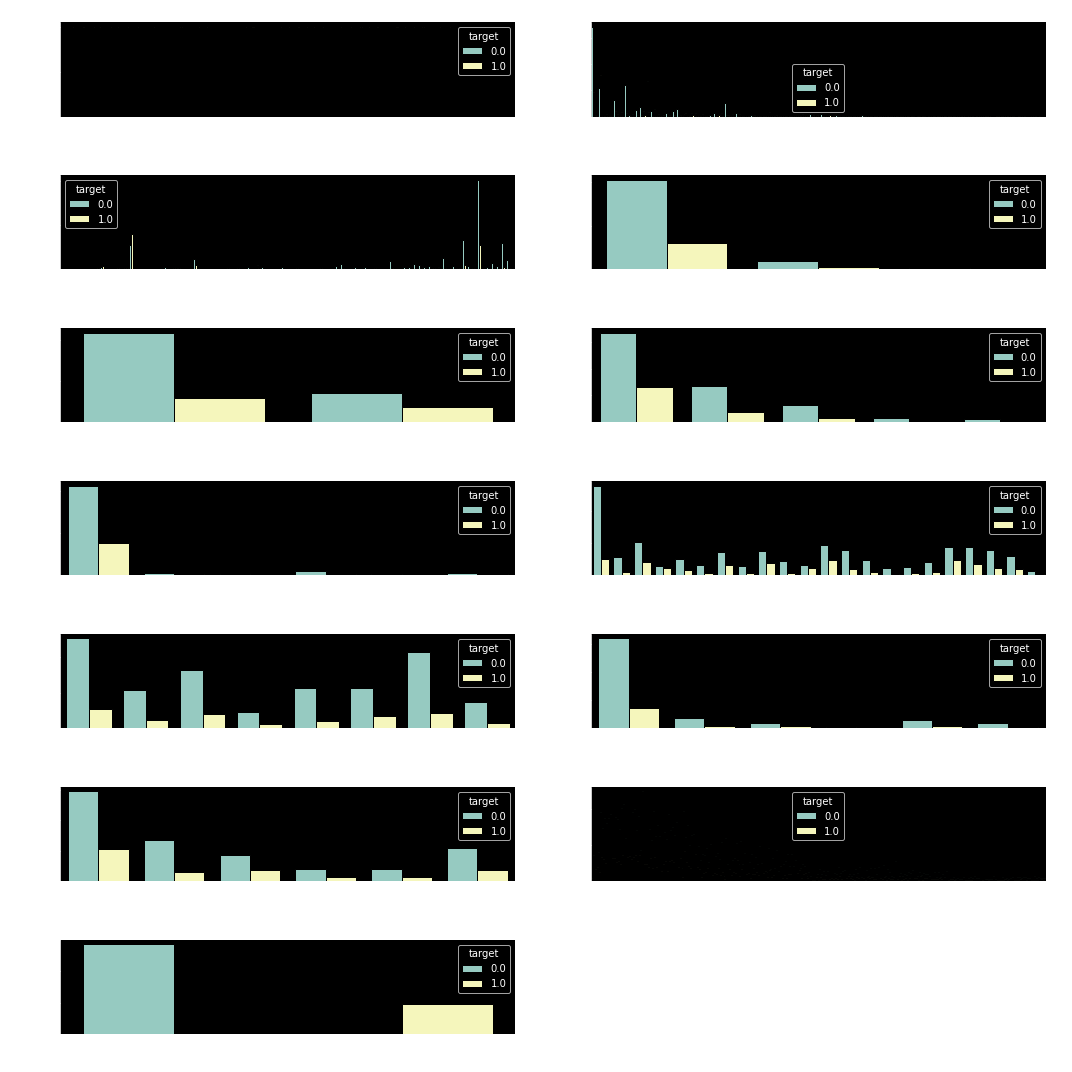

In [30]:

plt.figure(figsize=[15,15])
fft=["enrollee_id","city","city_development_index","gender","relevent_experience", "education_level","major_discipline", "experience","company_size","company_type","last_new_job","training_hours","target"]
n=1
for f in fft:
    plt.subplot(7,2,n)
    sns.countplot(x=f, hue='target', edgecolor="black", alpha=1, data=df)
    sns.despine()
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()
# Сраниваем все метрики с главной

1. Запоминаем для индивидуального разбора
2. Запоминаем для индивидуального разбора
3. Запоминаем для индивидуального разбора
4. Соотношение по полу без явных различий
5. У сотрудников без релевантного опыта больше желающих сменить работу, чем у сотрудников с релевантным опытом
6. У выпусников университета больше желающих сменить работу, чем у остальных.
7. Доля выпусников технических университетов самая большая среди аналитиков данных
8. Чем больше опыт работы, тем меньше желание сменить работу
9. Соотношение по размеру компании без явных различий
10.Большая часть аналитиков данных работает в обычных компаниях
11.Соотношение по кол-ву работ без явных различий
12.Запоминаем для индивидуального разбора
13.Рассмотрим доли в %

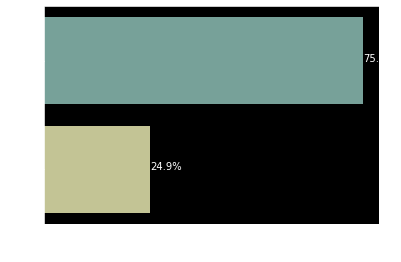

In [10]:
ax = sns.countplot(y="target", data=df, alpha=0.8)
total = df.shape[0]

for p in ax.patches:
    percent = '{:.1f}%'.format(100*(p.get_width()/total))
    x = p.get_x()+p.get_width()
    y = p.get_y()+(p.get_height())/2
    ax.annotate(percent,(x,y))
# Соотношение №12. Всего 25% хотят сменить работу от общей массы.

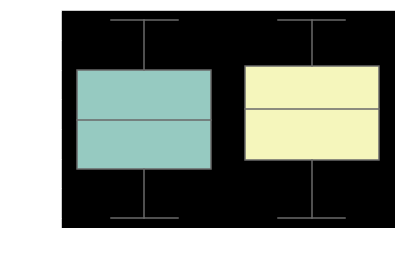

In [22]:
sns.boxplot(x='target',y='enrollee_id',data=df)
xlabel='target'
ylabel = 'enrollee_id'
# Соотношение №1

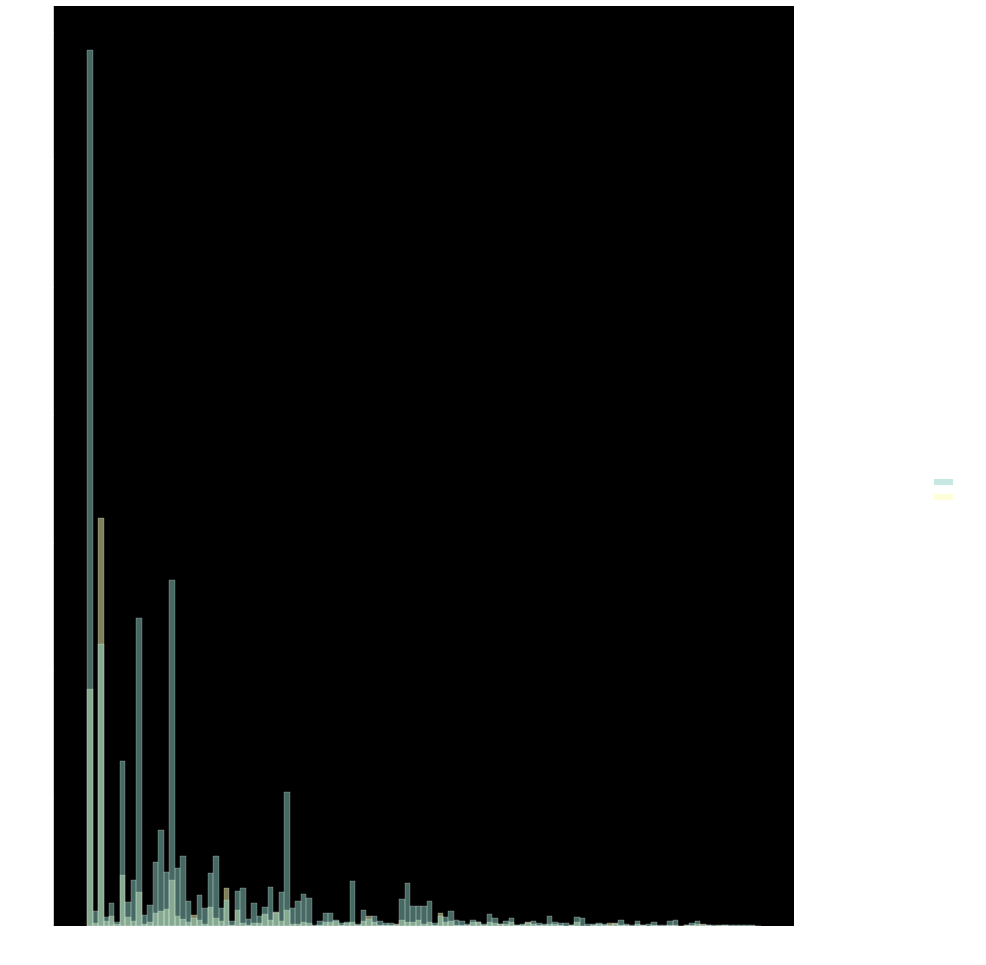

In [31]:

g = sns.displot(x='city',hue='target',data=df)
g.fig.set_size_inches(15,15)

# Соотношение №2

In [57]:
df.groupby('city')['target'].agg(['count','mean']).sort_values(['count','mean'], ascending=[False,False])


,count,mean
city,,
city_103,4355,0.213088
city_21,2702,0.591044
city_16,1533,0.116765
city_114,1336,0.099551
city_160,845,0.235503
city_136,586,0.104096
city_67,431,0.132251
city_75,305,0.101639
city_102,304,0.171053


In [5]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [42]:
q =(df[df['target']==1.0])

In [44]:
city_21 = (df[(df['city'] == 'city_21')&(df['target'] == 1.0)].groupby(['enrollee_id',
       'relevent_experience', 'enrolled_university',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'])['target'].agg(['mean','count']).sort_values(['mean','count'], ascending=[False,False]))


In [45]:
city_21

,,,,,,,,,,mean,count
enrollee_id,relevent_experience,enrolled_university,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,,
69,Has relevent experience,no_enrollment,STEM,2,50-99,Pvt Ltd,1,23,1.0,1.0,1
85,Has relevent experience,no_enrollment,STEM,5,<10,Early Stage Startup,1,28,1.0,1.0,1
134,Has relevent experience,no_enrollment,STEM,4,50-99,Funded Startup,1,174,1.0,1.0,1
158,Has relevent experience,no_enrollment,STEM,4,100-500,Pvt Ltd,1,92,1.0,1.0,1
164,Has relevent experience,no_enrollment,STEM,5,10/49,Funded Startup,never,56,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
33260,Has relevent experience,no_enrollment,STEM,6,10/49,Pvt Ltd,1,48,1.0,1.0,1
33286,No relevent experience,no_enrollment,STEM,2,500-999,Public Sector,1,75,1.0,1.0,1
33292,No relevent experience,no_enrollment,STEM,6,10000+,Pvt Ltd,never,21,1.0,1.0,1


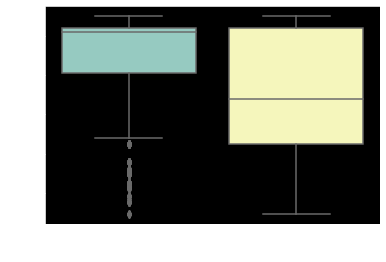

In [14]:
sns.boxplot(x='target',y='city_development_index',data=df)
xlabel='target'
ylabel = 'city_development_index'
# Соотношение №3

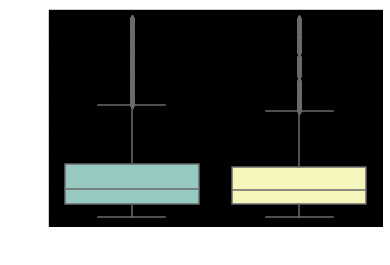

In [15]:
sns.boxplot(x='target',y='training_hours',data=df)
xlabel='target'
ylabel = 'training_hours'
# Соотношение №11

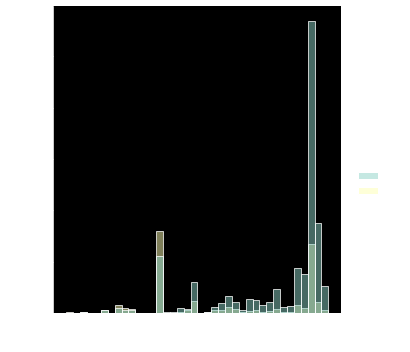

In [16]:
sns.displot(x ='city_development_index',hue='target',data =df)
# Соотношение №

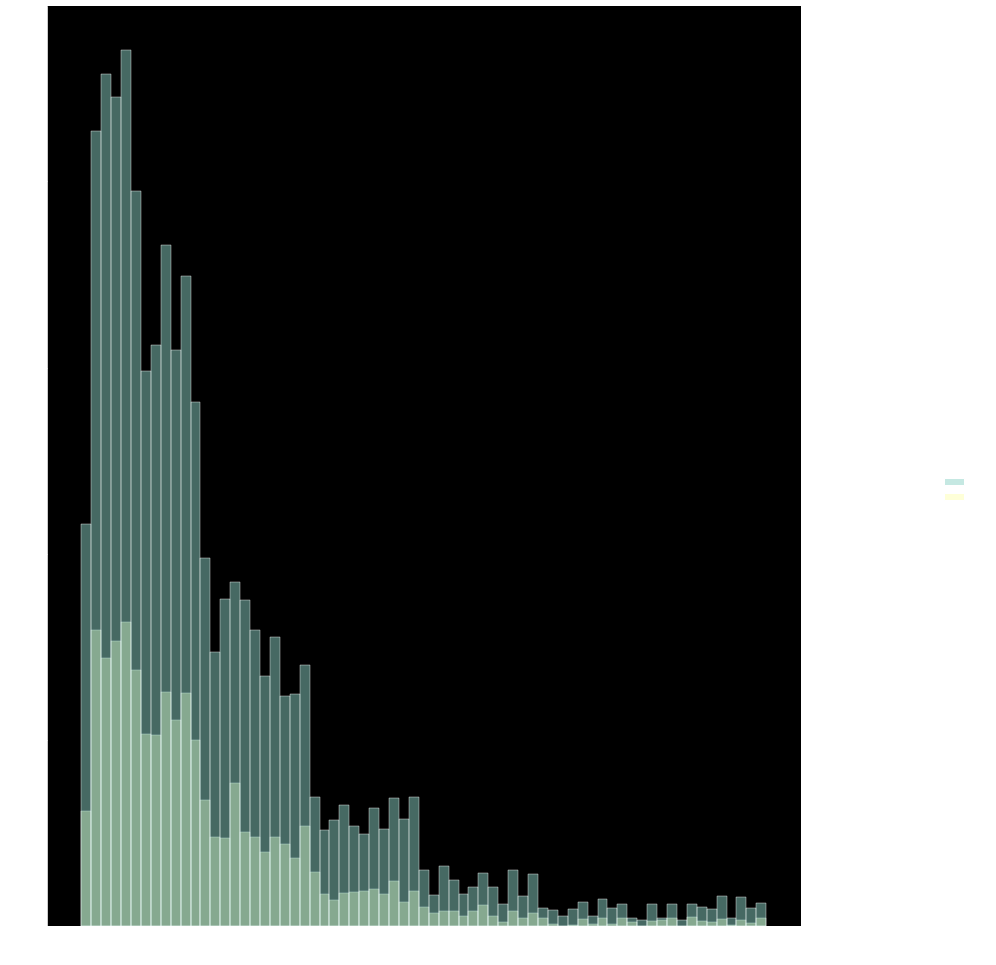

In [37]:

f = sns.displot(x='training_hours',hue= 'target',data = df)
f.fig.set_size_inches(15,15)

In [33]:
phik_overview=df.phik_matrix()

interval columns not set, guessing: ['enrollee_id', 'city_development_index', 'training_hours', 'target']


In [34]:
phik_overview

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,1.000000,0.214019,0.125181,0.080899,0.073145,0.051188,0.076123,0.030968,0.086949,0.032956,0.022543,0.045252,0.021517,0.067472
city,0.214019,1.000000,1.000000,0.168851,0.152621,0.376293,0.363706,0.178508,0.346552,0.249869,0.224174,0.240315,0.075165,0.477283
city_development_index,0.125181,1.000000,1.000000,0.062595,0.101448,0.245979,0.224368,0.129083,0.307770,0.130592,0.112234,0.172067,0.000000,0.482287
gender,0.080899,0.168851,0.062595,1.000000,0.034473,0.075682,0.070110,0.176281,0.117227,0.011700,0.114638,0.070741,0.025124,0.013202
relevent_experience,0.073145,0.152621,0.101448,0.034473,1.000000,0.237586,0.259716,0.098661,0.500107,0.074259,0.284810,0.539529,0.020727,0.199859
enrolled_university,0.051188,0.376293,0.245979,0.075682,0.237586,1.000000,0.215062,0.151561,0.434500,0.067175,0.231786,0.430596,0.000000,0.093803
education_level,0.076123,0.363706,0.224368,0.070110,0.259716,0.215062,1.000000,0.104318,0.302908,0.082131,0.116321,0.253235,0.030104,0.075999
major_discipline,0.030968,0.178508,0.129083,0.176281,0.098661,0.151561,0.104318,1.000000,0.116505,0.038923,0.089031,0.047317,0.000000,0.029200
experience,0.086949,0.346552,0.307770,0.117227,0.500107,0.434500,0.302908,0.116505,1.000000,0.127647,0.112121,0.468247,0.000000,0.238725
company_size,0.032956,0.249869,0.130592,0.011700,0.074259,0.067175,0.082131,0.038923,0.127647,1.000000,0.332074,0.102736,0.000000,0.071953


In [36]:
phik_overview['target'].sort_values(ascending=False)

target                    1.000000
city_development_index    0.482287
city                      0.477283
experience                0.238725
relevent_experience       0.199859
last_new_job              0.114708
enrolled_university       0.093803
education_level           0.075999
company_size              0.071953
enrollee_id               0.067472
company_type              0.066792
major_discipline          0.029200
training_hours            0.026849
gender                    0.013202
Name: target, dtype: float64

<AxesSubplot:>

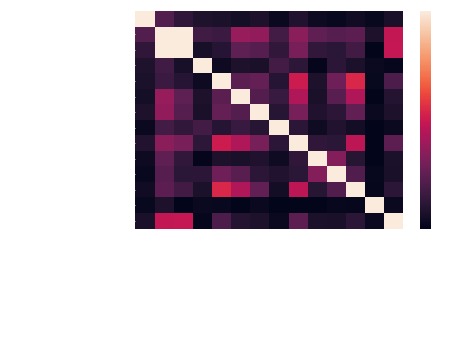

In [22]:
sns.heatmap(phik_overview)